In [133]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
fig=plt.figure(figsize=(20,8), dpi= 100, facecolor='w', edgecolor='k')

<Figure size 2000x800 with 0 Axes>

In [135]:
cats_dogs_data = pd.read_csv('dogs_n_cats.csv')
cats_dogs_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [136]:
cats_dogs_data.groupby('Вид').count()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
Вид,,,,,
котик,500,500,500,500,500
собачка,500,500,500,500,500


In [137]:
a = [0 for i in range(500)]
for i in range(500):
    a.append(1)


In [138]:
cats_dogs_data['kind'] = a

In [139]:
cats_dogs_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид,kind
0,15,18.0,1,1,0,собачка,0
1,20,24.0,1,0,0,собачка,0
2,34,40.8,1,1,0,собачка,0
3,26,31.2,1,1,0,собачка,0
4,16,19.2,1,1,0,собачка,0
...,...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик,1
996,7,2.8,1,0,1,котик,1
997,6,2.4,1,0,1,котик,1
998,7,2.8,1,0,1,котик,1


In [156]:
X = cats_dogs_data.drop(['Вид','kind'], axis=1)
y = cats_dogs_data.kind

In [157]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: kind, Length: 1000, dtype: int64

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [161]:
y_train

703    1
311    0
722    1
629    1
0      0
      ..
106    0
270    0
860    1
435    0
102    0
Name: kind, Length: 670, dtype: int64

In [162]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()

In [166]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cvs = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    tmp = pd.DataFrame({'max_depth': [max_depth],
                        'train_score': [train_score],
                        'test_score': [test_score],
                        'cross_val_score': [mean_cvs]})
    
    scores_data = scores_data.append(tmp)

Это было бесполезное действие потому, что на самом деле для классификации достаточно одной фичи - "Лазает по деревьям". Следовательно split будет всего один.

In [169]:
scores_data

,max_depth,train_score,cross_val_score,test_score
0,1,1.0,1.0,NaN
0,2,1.0,1.0,NaN
0,3,1.0,1.0,NaN
0,4,1.0,1.0,NaN
0,5,1.0,1.0,NaN
...,...,...,...,...
0,95,1.0,1.0,1.0
0,96,1.0,1.0,1.0
0,97,1.0,1.0,1.0
0,98,1.0,1.0,1.0


In [167]:
scores_data_l = pd.melt(scores_data, id_vars=['max_depth'],
                        value_vars=['train_score', 'test_score', 'cross_val_score'],
                        var_name='score_type',
                        value_name='score')

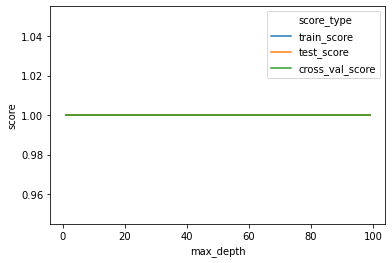

In [168]:
sns.lineplot(x='max_depth', y='score', hue='score_type', data=scores_data_l)

In [171]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [173]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [187]:
df_ts = pd.read_json('dataset_209691_15 (2).txt')

In [188]:
df_ts

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,18,21.6,1,1,0
1,27,32.4,1,1,0
2,17,20.4,0,1,0
3,19,22.8,1,1,0
4,19,22.8,1,1,0
...,...,...,...,...,...
95,9,3.6,1,0,1
96,7,2.8,1,0,1
97,9,3.6,1,0,1
98,5,2.0,0,0,1


In [189]:
X_train

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
703,13,5.2,1,0,1
311,34,40.8,1,1,0
722,5,2.0,1,1,0
629,9,3.6,1,0,1
0,15,18.0,1,1,0
...,...,...,...,...,...
106,34,40.8,1,1,0
270,30,36.0,1,1,0
860,11,4.4,1,0,1
435,16,19.2,1,1,0


In [190]:
result = clf.predict(df_ts)

In [191]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])